# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [662]:
csv1 = pd.read_csv('../raw_data/csv1.csv')
csv2 = pd.read_csv('../raw_data/csv2.csv')
csv3 = pd.read_csv('../raw_data/csv3.csv')
csv4 = pd.read_csv('../raw_data/csv4.csv')
csv5 = pd.read_csv('../raw_data/csv5.csv')
csv6 = pd.read_csv('../raw_data/csv6.csv')

In [663]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)

In [664]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')

csv_full

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/3997445115.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'Year_x', 'Country_x', 'ContinentCode_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/3997445115.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'Year_x', 'Country_x', 'ContinentCode_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,Afghanistan,AFG,AS,1960.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962.0,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [665]:
csv_full.isna().sum()

Country_x                                                   3796
Code_x                                                      3796
ContinentCode_x                                             4716
Year_x                                                      3796
Military spending percent of total government spending      8431
                                                            ... 
State legitimacy index 0 (high) - 10 (low)                  9751
Human rights and rule of law index 0 (high) - 10 (low)      9750
Demographic pressures 0 (low) - 10 (high)                   9750
Refugees and displaced persons index 0 (low) - 10 (high)    9750
External interventions index 0 (low) - 10 (high)            9750
Length: 114, dtype: int64

In [666]:
conflicts = pd.read_csv('../raw_data/conflict_data_1970.csv')

In [667]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [668]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [669]:
def get_code(row):
    
    code_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [670]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [671]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

# DELETING TINY PROVINCES/STATES

In [672]:
tiny_countries = ['Andorra','Antigua and Barbuda','Aruba','Belize','Bhutan','Brunei','Cape Verde','Comoros','Dominica','Kiribati',
                 'Micronesia','Montserrat','Palau','Saint Vincent and the Grenadines','Sao Tome and Principe','Solomon Islands','Taiwan',
                  'Tuvalu','Vanuatu','Euro area','Faroe Islands','Gibraltar','Macao','New Caledonia','San Marino','Norfolk Island','Holy See (Vatican City)']
csv_full = csv_full.set_index('country_all').drop(tiny_countries)
csv_full.reset_index(inplace=True)
csv_full[csv_full['country_all']=='Syria']


,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all
7293,Syria,Syria,SYR,AS,1960.0,NaN,37.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
7294,Syria,Syria,SYR,AS,1961.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961
7295,Syria,Syria,SYR,AS,1962.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962
7296,Syria,Syria,SYR,AS,1963.0,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963
7297,Syria,Syria,SYR,AS,1964.0,NaN,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,Syria,Syria,SYR,AS,2018.0,NaN,181.0,NaN,NaN,NaN,...,9.9,9.9,8.5,7.8,9.9,9.9,8.2,10.0,10.0,2018
7352,Syria,Syria,SYR,AS,2019.0,NaN,NaN,NaN,NaN,NaN,...,9.9,10.0,8.8,7.5,9.9,10.0,7.9,10.0,10.0,2019
7353,Syria,Syria,SYR,AS,2020.0,NaN,72.0,NaN,NaN,NaN,...,9.9,10.0,8.7,7.2,10.0,10.0,7.6,10.0,10.0,2020
9901,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,9.7,9.6,7.1,10.0,9.7,7.6,9.7,10.0,2021


In [673]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [674]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [675]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [676]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [677]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [678]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id


In [679]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [680]:
final_df.shape

(470, 117)

In [683]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Dropping features

In [684]:
final_df.shape

(470, 117)

In [685]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [686]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [687]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [2553]:
untouched_final['country_all'].unique()

array(['Rwanda', 'Senegal', 'Bangladesh', 'Nepal', 'Georgia', 'Iraq',
       'Sierra Leone', 'Algeria', 'Tajikistan', 'Afghanistan', 'Peru',
       'Bosnia and Herzegovina', 'Thailand', 'Burundi', 'Yemen',
       'Bahrain', 'Democratic Republic of the Congo', 'Albania',
       'Guinea-Bissau', 'Indonesia', 'Iran', 'Liberia', 'Philippines',
       'Ivory Coast', 'Argentina', 'Sudan', 'Ecuador', 'Kyrgyzstan',
       'Armenia', 'Somalia', 'Madagascar', 'Tunisia', 'Greece',
       'Maldives', 'Syria', 'Libya', 'Egypt', 'Romania',
       'Central African Republic', 'Mali', 'Cambodia', 'Brazil',
       'Ethiopia', 'Venezuela', 'Burkina Faso', 'Turkey', 'Mozambique',
       'Cameroon', 'Haiti', 'Chile', 'India', 'Belarus', 'Nigeria',
       'Cuba', 'South Africa', 'Colombia', 'Burma (Myanmar)', 'Russia',
       'Pakistan', 'Uzbekistan', 'Sri Lanka', 'Kazakhstan'], dtype=object)

In [688]:
untouched_final = final_df
untouched_final

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,0.813,Kazakhstan2017,Kazakhstan,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,0.817,Kazakhstan2018,Kazakhstan,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,0.817,Kazakhstan2019,Kazakhstan,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,0.825,Kazakhstan2020,Kazakhstan,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


In [599]:
y = final_df[['Capital investment as percent of GDP','GDP per capita Purchasing Power Parity','Refugee population',
                'Labor freedom index (0-100)','Corruption Perceptions Index 100 = no corruption', 'Youth unemployment ages 15-24','Economic decline index 0 (low) - 10 (high)',
                 'Freedom from corruption index (0-100)','Food production index (2004-2006 = 100)','Social globalization index (0-100)',
                 'Banking system z-scores','Population size in millions', 'Rural population percent of total population','Population growth percent',
                 'Internet users percent of population','External debt percent of Gross National Income',
                                                   'Economic freedom overall index (0-100)', 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)', 'Life expectancy in years', 'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births', 'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Human rights and rule of law index 0 (high) - 10 (low)', 'Voice and accountability index (-2.5 weak; 2.5 strong)', 'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP']].describe()
z = pd.DataFrame(y.T['count']/len(final_df))
z.sort_values('count').tail(50)

,count
Factionalized elites index 0 (low) - 10 (high),0.561702
Security threats index 0 (low) - 10 (high),0.561702
Economic decline index 0 (low) - 10 (high),0.561702
Human rights and rule of law index 0 (high) - 10 (low),0.561702
Labor freedom index (0-100),0.565957
Banking system z-scores,0.570213
Corruption Perceptions Index 100 = no corruption,0.582979
Economic freedom overall index (0-100),0.644681
Freedom from corruption index (0-100),0.674468
Regulatory quality index (-2.5 weak; 2.5 strong),0.680851


In [ ]:
# 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
# 'Economic decline index 0 (low) - 10 (high)',
# 'Human rights and rule of law index 0 (high) - 10 (low)',
# 'Labor freedom index (0-100)',
# 'Banking system z-scores',
# 'Corruption Perceptions Index 100 = no corruption',
# 'Economic freedom overall index (0-100)', 'Freedom from corruption index (0-100)',
# 'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Voice and accountability index (-2.5 weak; 2.5 strong)',
# 'External debt percent of Gross National Income', 'GDP per capita Purchasing Power Parity'

# Dropping data for the imputer

In [ ]:
# columns = ['Capital investment as percent of GDP','GDP per capita Purchasing Power Parity','Refugee population',
#                 'Labor freedom index (0-100)','Corruption Perceptions Index 100 = no corruption', 'Youth unemployment ages 15-24','Economic decline index 0 (low) - 10 (high)',
#                  'Freedom from corruption index (0-100)','Food production index (2004-2006 = 100)','Social globalization index (0-100)',
#                  'Banking system z-scores','Population size in millions', 'Rural population percent of total population','Population growth percent',
#                  'Internet users percent of population','External debt percent of Gross National Income',
#                                                    'Economic freedom overall index (0-100)', 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
#            'Life expectancy in years', 'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births', 'Regulatory quality index (-2.5 weak; 2.5 strong)',
#            'Human rights and rule of law index 0 (high) - 10 (low)', 'Voice and accountability index (-2.5 weak; 2.5 strong)', 'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP'])

In [ ]:
columns = ['Capital investment as percent of GDP','Refugee population', 'Youth unemployment ages 15-24',
           'Food production index (2004-2006 = 100)','Social globalization index (0-100)',
           'Population size in millions', 'Rural population percent of total population',
           'Population growth percent', 'Internet users percent of population', 'Life expectancy in years',
           'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births',
           'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP']

In [568]:
bin_list = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population',
            'Homicides per 100000 people','Real interest rate: Bank lending rate minus inflation','Public spending on education percent of GDP',
                 'Shadow economy percent of GDP','Suicide mortality rate per 100000 population',
                 'Government debt as percent of GDP','Fiscal balance percent of GDP','Access to electricity percent of the population',
           
            'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
            'Economic decline index 0 (low) - 10 (high)','Human rights and rule of law index 0 (high) - 10 (low)',
            'Labor freedom index (0-100)', 'Banking system z-scores', 'Corruption Perceptions Index 100 = no corruption',
            'Economic freedom overall index (0-100)', 'Freedom from corruption index (0-100)',
            'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Voice and accountability index (-2.5 weak; 2.5 strong)',
            'External debt percent of Gross National Income', 'GDP per capita Purchasing Power Parity']
final_df.head()

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0


In [569]:
cleaner_df = final_df.drop(columns=bin_list)

In [570]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [571]:
cleaner_df

,country_all,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,...,Political globalization index (0-100),Social globalization index (0-100),Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,NaN,3.0,NaN,Rwanda1985,4.40,279.10,17.31,1.8,NaN,...,33.79,14.37,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,NaN,2.0,NaN,Rwanda1986,5.47,301.80,15.87,-1.1,NaN,...,34.60,14.53,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,NaN,2.0,NaN,Rwanda1988,4.50,337.96,14.49,3.0,NaN,...,34.47,15.68,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,Rwanda1987,-0.02,318.21,15.66,4.1,NaN,...,34.44,15.15,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,Rwanda1989,-0.04,330.50,13.43,1.0,NaN,...,34.86,15.76,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,3.45,214.0,0.813,Kazakhstan2017,4.10,9247.58,26.35,7.4,4.90,...,71.61,69.83,7.6,4.2,8.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,4.65,310.0,0.817,Kazakhstan2018,4.10,9812.63,25.26,6.0,4.85,...,70.76,68.69,7.9,3.9,8.4,4.2,2.7,3.9,2018,93
3940,Kazakhstan,5.25,312.0,0.817,Kazakhstan2019,4.50,9812.60,27.63,5.2,4.80,...,71.15,66.51,8.1,3.6,8.5,3.9,2.4,3.6,2019,93
3941,Kazakhstan,4.56,268.0,0.825,Kazakhstan2020,-2.50,9121.64,28.52,6.7,4.89,...,NaN,NaN,8.2,3.3,8.5,3.6,2.3,3.3,2020,93


# Grouping the data


In [572]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [573]:
grouped_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'Government spending as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Government effectiveness index (-2.5 weak; 2.5 strong)',
       'Control of corruption (-2.5 weak; 2.5 strong)',
       'Political stability index (-2.5 weak; 2.5 strong)',
       'Politica

# Create the control dataset

In [574]:
conflict_years = final_df['CountryYear']

In [575]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [576]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [600]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270,random_state=1033)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

In [601]:
id_list = list(range(95,365))*5

In [602]:
id_list = sorted(id_list)

In [603]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Belarus', 'Mozambique', 'Australia', 'Togo', 'Slovakia', 'Norway',
       'Senegal', 'Spain', 'Benin', 'Japan', 'Oman', 'Venezuela',
       'Algeria', 'Mali', 'Malta', 'Maldives', 'Samoa', 'Singapore',
       'Colombia', 'Uruguay', 'Dominican Republic', 'Palestine',
       'Finland', 'Switzerland', 'Liberia', 'Canada', 'Costa Rica',
       'Denmark', 'Germany', 'Equatorial Guinea', 'India', 'Chad',
       'Burundi', 'Nepal', 'Honduras', 'Uganda', 'Fiji', 'Rwanda',
       'Bolivia', 'Czechia', 'Bahrain', 'New Zealand', 'Cyprus',
       'Bosnia and Herzegovina', 'Egypt', 'Belgium', 'Kazakhstan',
       'Austria', 'France', 'Botswana', 'Hong Kong', 'Afghanistan',
       'Bermuda', 'Malawi', 'Georgia', 'Panama', 'Pakistan',
       'Burma (Myanmar)', 'Croatia', 'United Arab Emirates', 'Gabon',
       'USA', 'Laos', 'Peru', 'Cameroon', 'Serbia', 'Uzbekistan',
       'Ethiopia', 'Grenada', 'Sierra Leone', 'Niger', 'Hungary',
       'Turkey', 'Malaysia', 'Somalia', 'Ecuador', 'China', 

In [604]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [605]:
columns_to_keep = list(grouped_df.columns)

In [628]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,Labor force participation rate,...,Globalization index (0-100),Economic globalization index (0-100),Political globalization index (0-100),Social globalization index (0-100),Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,,,,,,,
95,30.612500,NaN,0.6970,6.814,1639.672,24.992,63.74,10.972,20.840,59.778,...,49.7100,48.6860,52.858,47.3380,NaN,NaN,NaN,NaN,NaN,NaN
96,11.437500,NaN,0.2185,7.066,272.610,26.040,NaN,2.710,5.590,84.230,...,27.1060,39.5720,29.724,12.0220,NaN,NaN,NaN,NaN,NaN,NaN
97,5.138000,1415.6,0.9384,2.004,53510.482,23.926,1.50,5.644,12.654,65.330,...,81.6925,67.8525,89.375,87.9575,3.66,1.92,0.88,1.46,1.96,0.78
98,7.662000,1.0,0.4678,5.728,555.982,23.900,4.00,2.532,4.196,58.392,...,52.7720,54.6900,63.186,39.5460,5.58,7.62,7.68,7.96,6.22,6.90
99,3.116000,5.0,0.8302,2.080,17610.504,23.778,2.94,12.700,29.540,59.028,...,82.0020,78.5340,85.402,82.0620,4.72,5.54,4.02,4.00,2.06,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,5.136000,1319.4,0.7558,5.748,9473.840,43.210,2.20,4.554,10.740,69.326,...,64.6300,46.2575,90.405,57.2225,7.66,6.98,8.60,6.26,4.58,2.62
361,2.114000,16.0,0.7866,1.156,19068.394,NaN,7.16,3.268,7.800,60.804,...,66.4180,68.8560,55.828,74.5680,4.56,6.52,5.64,5.38,3.10,4.50
362,5.226667,NaN,0.4532,2.456,667.842,19.918,6.72,9.480,13.196,58.854,...,51.8700,48.6580,57.396,49.4580,3.66,6.98,7.92,8.12,6.56,7.16


In [607]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [608]:

imputer = IterativeImputer(max_iter=10, random_state=2, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=2, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']



full_dataset = pd.concat([grouped_df,sample_full_clean])

In [609]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,Labor force participation rate,...,Economic globalization index (0-100),Political globalization index (0-100),Social globalization index (0-100),Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,8.627507,2.333333,0.320660,2.862,313.514,15.352,1.760000,8.981725,15.062458,69.741505,...,20.078000,34.432000,15.098000,6.690099,8.207466,8.585476,10.053791,7.641107,9.384897,1.0
1,8.344304,16.000000,0.370558,3.200,823.864,13.258,2.740000,8.981477,15.449378,66.668469,...,36.974000,62.828000,21.962000,6.778792,7.858377,6.292682,9.309377,6.906859,8.420312,1.0
2,10.390000,122.200000,0.335491,3.308,257.922,15.868,7.766667,7.206764,12.827357,68.495315,...,19.638000,48.658000,12.956000,7.407430,8.216599,7.173079,10.084361,8.154564,9.522783,1.0
3,8.556771,2.000000,0.332232,4.888,174.638,21.562,11.140000,8.471216,14.857301,70.688345,...,17.994000,44.260000,12.112000,6.718932,7.694886,6.879682,9.561039,7.436595,9.259050,1.0
4,9.014637,122.245504,0.647930,-4.666,1614.640,29.614,93.479423,7.502918,14.638591,65.840000,...,50.097912,58.741136,47.815236,6.997592,8.008013,6.776255,7.594987,6.000660,6.694064,1.0


In [610]:
#  data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

In [611]:
# imputed_control_df

In [612]:
# separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
# separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
# separate_impute_full_df
# imputed_final_df

In [613]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [614]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [357]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [517]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military spending percent of total government spending,364.0,8.979579,5.988907,-3.808118,4.826500,8.218000,11.663476,3.643200e+01
Arms imports million constant U.S. dollars,364.0,173.137616,351.493789,-478.395394,9.187500,52.650000,167.482342,2.765800e+03
Human Development Index (0 - 1),364.0,0.620388,0.182761,0.141739,0.468500,0.648563,0.759850,9.714015e-01
Economic growth: the rate of change of real GDP,364.0,3.744520,4.967858,-15.180000,1.784500,3.523499,5.041500,5.619800e+01
GDP per capita current U.S. dollars,364.0,8871.744189,16217.914448,111.008000,747.466000,2323.522000,8662.024173,1.187965e+05
GDP per capita Purchasing Power Parity,364.0,14630.892133,17024.157483,-6190.808167,3093.521000,8760.764000,18902.193209,9.551646e+04
Capital investment as percent of GDP,364.0,23.035930,7.363549,0.000000,18.585000,22.868000,25.973000,5.078400e+01
Inflation: percent change in the Consumer Price Index,364.0,87.235333,573.723757,-223.905040,2.640000,6.070000,13.645000,6.517100e+03
Unemployment rate,364.0,8.386432,5.922786,0.652000,4.548500,7.256000,10.624500,3.671400e+01
Youth unemployment ages 15-24,364.0,16.997611,11.565902,0.870000,8.717500,15.139533,22.530500,6.144800e+01


# Scaler on whole dataset

In [615]:
from sklearn.preprocessing import MinMaxScaler
imputed_final_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'Government spending as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Government effectiveness index (-2.5 weak; 2.5 strong)',
       'Control of corruption (-2.5 weak; 2.5 strong)',
       'Political stability index (-2.5 weak; 2.5 strong)',
       'Politica

In [616]:
scaler = MinMaxScaler()



In [617]:
imputed_final_df = imputed_final_df.drop(columns = ['Capital investment as percent of GDP','Refugee population', 'Youth unemployment ages 15-24',
           'Food production index (2004-2006 = 100)','Social globalization index (0-100)',
           'Population size in millions', 'Rural population percent of total population',
           'Population growth percent', 'Internet users percent of population', 'Life expectancy in years',
           'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births',
           'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP'])

In [2392]:
full_dataset_scaled = pd.DataFrame(scaler.fit_transform(imputed_final_df), columns=imputed_final_df.columns)

# LET'S MODEL

In [2393]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2394]:
scaler.fit(imputed_final_df)

MinMaxScaler()

In [2395]:
X = full_dataset_scaled.drop(columns=['target'])
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

In [620]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [2396]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [2397]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [623]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
accuracy_score(preds,y_test)


0.6454545454545455

In [624]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=True).tail(40)





,importance
feature,
Government effectiveness index (-2.5 weak; 2.5 strong),0.003593
Uneven economic development index 0 (low) - 10 (high),0.006789
Military spending percent of total government spending,0.006918
Political globalization index (0-100),0.008469
GDP per capita current U.S. dollars,0.014720
Refugees and displaced persons index 0 (low) - 10 (high),0.018553
Political rights index 7 (weak) - 1 (strong),0.019327
Human Development Index (0 - 1),0.020749
Demographic pressures 0 (low) - 10 (high),0.020969


In [2420]:
get_hist_df('Iran', 2022, lookback = 5)

NameError: name 'get_hist_df' is not defined

In [2427]:
get_prob('Iran', 1995, lookback = 5)

/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Group grievance index 0 (low) - 10 (high),target
0,0.542518,0.635207,0.066710,0.521944,0.225616,0.155446,0.357532,0.186164,0.670444,0.256040,0.494190,0.027644,0.736075,1.0
1,0.555303,0.533539,0.108775,0.506174,0.397221,0.282660,0.471414,0.294533,0.366667,0.590450,0.295949,0.251771,0.665655,1.0
2,0.559389,0.535360,0.041450,0.553205,0.295647,0.192023,0.383162,0.213420,0.533333,0.492220,0.274147,0.021808,0.742444,1.0
3,0.619156,0.566478,0.079795,0.526227,0.301700,0.196689,0.399360,0.206213,0.366667,0.398011,0.348028,0.000000,0.706508,1.0
4,0.257755,0.583710,0.213567,0.594172,0.425240,0.336563,0.530465,0.386180,0.536467,0.789462,0.209542,0.483998,0.599930,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.517174,0.507822,0.257197,0.691476,0.991441,0.977681,0.864461,0.949451,0.000000,0.968054,0.208529,0.871753,0.290058,0.0
360,0.576638,0.447070,0.468360,0.745632,0.537927,0.403147,0.706641,0.423433,0.666667,0.972076,0.062420,0.723901,0.436864,0.0
361,0.557800,0.378050,0.232831,0.566694,0.598874,0.614508,0.815368,0.549800,0.166667,0.419841,0.236354,0.375295,0.245846,0.0
362,0.644651,0.435653,0.196269,0.576561,0.423986,0.284524,0.570511,0.275457,0.333333,0.829500,0.132996,0.214072,0.573071,0.0


In [2428]:
def get_imputed_df(country,year,lookback=5):
    
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in list(grouped_df.columns)],inplace=True)
    
    
    full_dataset = pd.concat([grouped_df,sample_full_clean])
    
    data_numeric = full_dataset.select_dtypes(include=numerics)

    imputer.fit(data_numeric)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    df = get_imputed_df(country,year,lookback)
    scaler.fit(imputed_final_df)
    df['target'] = 0.5
    scaled_df = pd.DataFrame(scaler.transform(df),columns=df.columns)
    scaled_df.drop(columns = 'target',inplace=True)

    full_dataset_scaled = pd.DataFrame(scaler.transform(imputed_final_df), columns=imputed_final_df.columns)


    X = full_dataset_scaled.drop(columns=['target'])
    y = full_dataset_scaled['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

    bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                        objective='binary:logistic')

    bst.fit(X_train, y_train)
    
    prob = bst.predict_proba(scaled_df)[0][1]
    
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list

# NEXT STEPS:
#     - FINE TUNE MODEL PARAMS WITH GRID SEARCH / FEATURE SET TO IMPROVE PERFORMANCE 
#     - DELETE FEATURES SO LESS IMPUTATION/SOME ACTUAL TIME PROGRESS
#     - MORE STREAMLIT/START PUTTING PRESENTATION TOGETHER
#     - TRY GET GRAPH WORKING
#     - LOOK AT OTHER METRICS FOR MODEL - RECALL AND PRECISION
# AUTOML For hyperparams
# delete pre 1990 data
# add more non conflicts.. 1:3 or 1:4 - but be sure to look at recall and precision as well

    



/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion 

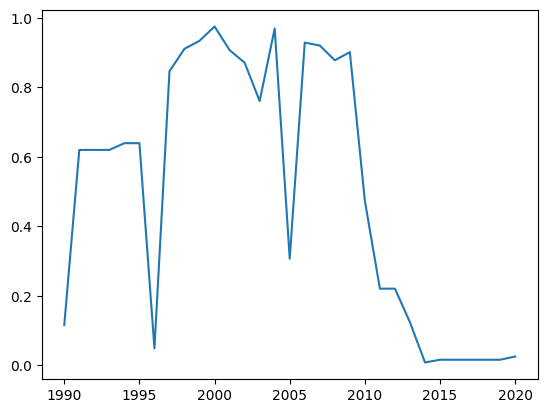

In [2403]:

def plot_prob_series(country,start_year,end_year,lookback=5):
    
    sns.lineplot(x = list(range(start_year,end_year+1)),y=prob_series(country,start_year,end_year,lookback))
    
plot_prob_series('Somalia',1990,2020)




In [64]:
codes = pd.read_csv('../raw_data/country_code_example.csv')


def lambda_prob(row):
    
    prob_value = get_prob(row['Country from our model'],2021)
    
    return prob_value

code_dict = pd.Series(codes['Country from our model'].values,index=codes.Code).to_dict()

codes2 = codes[['Country from our model', 'Code']].dropna()

codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
# codes2
# codes2['next_year_prob'] = get_prob(codes2['Country from our model'],2022)

codes2 = codes[['Country from our model', 'Code']].dropna()
codes2

,Country from our model,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG
...,...,...
170,Venezuela,VEN
171,Vietnam,VNM
172,Yemen,YEM
173,Zambia,ZMB


In [65]:

def get_year_probs(year):
    def lambda_prob(row):
    
        prob_value = get_prob(row['Country from our model'],year)
    
        return prob_value
    codes3 = codes[['Country from our model', 'Code']].dropna()
    
    codes3[year] = codes3.apply(lambda x: lambda_prob(x),axis=1)
    return codes3

get_year_probs(1990)

time_series_probs = [get_year_probs(i) for i in range(1990,2023)]


In [68]:
time_series_probs[20]

,Country from our model,Code,2010
0,Afghanistan,AFG,0.656468
1,Albania,ALB,0.741733
2,Algeria,DZA,0.646674
3,Angola,AGO,0.379188
4,Argentina,ARG,0.518064
...,...,...,...
170,Venezuela,VEN,0.470702
171,Vietnam,VNM,0.628353
172,Yemen,YEM,0.501278
173,Zambia,ZMB,0.501278


# Downloading the data

In [ ]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [719]:
y = untouched_final[['Capital investment as percent of GDP','GDP per capita Purchasing Power Parity','Refugee population',
                'Labor freedom index (0-100)','Corruption Perceptions Index 100 = no corruption', 'Youth unemployment ages 15-24','Economic decline index 0 (low) - 10 (high)',
                 'Freedom from corruption index (0-100)','Food production index (2004-2006 = 100)','Social globalization index (0-100)',
                 'Banking system z-scores','Population size in millions', 'Rural population percent of total population','Population growth percent',
                 'Internet users percent of population','External debt percent of Gross National Income',
                                                   'Economic freedom overall index (0-100)', 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)', 'Life expectancy in years', 'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births', 'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Human rights and rule of law index 0 (high) - 10 (low)', 'Voice and accountability index (-2.5 weak; 2.5 strong)', 'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP']].describe()
z = pd.DataFrame(y.T['count']/len(final_df))
z.sort_values('count').tail(50)

,count
Factionalized elites index 0 (low) - 10 (high),0.561702
Security threats index 0 (low) - 10 (high),0.561702
Economic decline index 0 (low) - 10 (high),0.561702
Human rights and rule of law index 0 (high) - 10 (low),0.561702
Labor freedom index (0-100),0.565957
Banking system z-scores,0.570213
Corruption Perceptions Index 100 = no corruption,0.582979
Economic freedom overall index (0-100),0.644681
Freedom from corruption index (0-100),0.674468
Regulatory quality index (-2.5 weak; 2.5 strong),0.680851


In [1711]:
y = final_df[['Real interest rate: Bank lending rate minus inflation','Fiscal balance percent of GDP',
                 'Public spending on education percent of GDP','Government debt as percent of GDP',
                 'External debt percent of Gross National Income', 'GDP per capita Purchasing Power Parity',
                 'Banking system z-scores', 
                 
             'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
            'Economic decline index 0 (low) - 10 (high)','Human rights and rule of law index 0 (high) - 10 (low)',
            'External interventions index 0 (low) - 10 (high)',  'Uneven economic development index 0 (low) - 10 (high)',
            'Refugees and displaced persons index 0 (low) - 10 (high)', 'Demographic pressures 0 (low) - 10 (high)',
            'State legitimacy index 0 (high) - 10 (low)',
                 
            'Refugee population',
                 
             'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Voice and accountability index (-2.5 weak; 2.5 strong)',
                 
            
            'Military spending percent of total government spending ', 'Arms imports million constant U.S. dollars',
                #
            'Capital investment as percent of GDP', 'Youth unemployment ages 15-24',
           'Food production index (2004-2006 = 100)','Social globalization index (0-100)',
           'Population size in millions', 'Rural population percent of total population',
           'Population growth percent', 'Internet users percent of population', 'Life expectancy in years',
           'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births',
           'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP',
              
              'Labor freedom index (0-100)', 
            'Economic freedom overall index (0-100)', 'Freedom from corruption index (0-100)',
               
               'Government spending as percent of GDP', 'Income from natural resources percent of GDP',
              'Human Development Index (0 - 1)', 'Inflation: percent change in the Consumer Price Index',
               'GDP per capita current U.S. dollars', 'Foreign aid and official development assistance received',
               
                
              
                'Unemployment rate', 'Political globalization index (0-100)',
               
               
                
                 'Government effectiveness index (-2.5 weak; 2.5 strong)',
                 
                 'Homicides per 100000 people']].describe()
z = pd.DataFrame(y.T['count']/len(final_df))
z.sort_values('count').head(50)

,count
Homicides per 100000 people,0.372340
Real interest rate: Bank lending rate minus inflation,0.519149
Public spending on education percent of GDP,0.525532
Factionalized elites index 0 (low) - 10 (high),0.561702
Security threats index 0 (low) - 10 (high),0.561702
Economic decline index 0 (low) - 10 (high),0.561702
Human rights and rule of law index 0 (high) - 10 (low),0.561702
External interventions index 0 (low) - 10 (high),0.561702
Uneven economic development index 0 (low) - 10 (high),0.561702
Refugees and displaced persons index 0 (low) - 10 (high),0.561702


In [272]:
'Economic freedom overall index (0-100)', 'Civil liberties index 7 (weak) - 1 (strong) ', 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)', 'Life expectancy in years'

'Deaths of children under five years of age per 1000 live births', 'Regulatory quality index (-2.5 weak; 2.5 strong)'

'Human rights and rule of law index 0 (high) - 10 (low)', 'Voice and accountability index (-2.5 weak; 2.5 strong)'
'Globalization index', 'Foreign Direct Investment percent of GDP'

Human Development Index (0 - 1)	0.003124
Deaths of children under five years of age per 1000 live births	0.003319
Regulatory quality index (-2.5 weak; 2.5 strong)	0.004066
Inflation: percent change in the Consumer Price Index	0.004221
Foreign aid and official development assistance received	0.004769
Refugees and displaced persons index 0 (low) - 10 (high)	0.005413
Foreign Direct Investment percent of GDP	0.007147
Government spending as percent of GDP	0.007582

Political rights index 7 (weak) - 1 (strong)	0.003255
Deaths of children under five years of age per 1000 live births	0.004224
Voice and accountability index (-2.5 weak; 2.5 strong)	0.004807
Human rights and rule of law index 0 (high) - 10 (low)	0.005456
Economic globalization index (0-100)	0.006867
Regulatory quality index (-2.5 weak; 2.5 strong)	0.007481
External interventions index 0 (low) - 10 (high)

Human rights and rule of law index 0 (high) - 10 (low)	0.002136
Voice and accountability index (-2.5 weak; 2.5 strong)	0.002186
Economic globalization index (0-100)

Human Development Index (0 - 1)	0.000988
Government effectiveness index (-2.5 weak; 2.5 strong)	0.001066
Globalization index (0-100)	0.001121
Government spending as percent of GDP	0.002762
Income from natural resources percent of GDP	0.004874
Inflation: percent change in the Consumer Price Index	0.006918
Death rate per 1000 people	0.007079
Labor force participation rate	

Government spending as percent of GDP	0.003144
Death rate per 1000 people	0.003912
Labor force participation rate	0.004799
External interventions index 0 (low) - 10 (high)	0.009071
Inflation: percent change in the Consumer Price Index	
    
Globalization index (0-100)	0.002704
Group grievance index 0 (low) - 10 (high)	0.009351
Arms imports million constant U.S. dollars

hmmm...
Control of corruption (-2.5 weak; 2.5 strong)	0.000000
Foreign aid and official development assistance received	0.004683
Demographic pressures 0 (low) - 10 (high)	0.004706
Human Development Index (0 - 1)	

Death rate per 1000 people	0.005644
Unemployment rate	0.009227
Control of corruption (-2.5 weak; 2.5 strong)	0.009465
Economic growth: the rate of change of real GDP
    
Rule of law index (-2.5 weak; 2.5 strong)	0.002201
Human Development Index (0 - 1)	0.005928
Labor force participation rate	

GDP per capita current U.S. dollars	0.001547
Death rate per 1000 people	0.004478
Government effectiveness index (-2.5 weak; 2.5 strong)	0.006379
Uneven economic development index 0 (low) - 10 (high)	0.007204
Political stability index (-2.5 weak; 2.5 strong)

State legitimacy index 0 (high) - 10 (low)	0.001651
Unemployment rate	

Death rate per 1000 people	0.002126
Uneven economic development index 0 (low) - 10 (high)

Government effectiveness index (-2.5 weak; 2.5 strong)	0.003593
Uneven economic development index 0 (low) - 10 (high)	0.006789
Military spending percent of total government spending	0.006918
Political globalization index (0-100)	

Political rights index 7 (weak) - 1 (strong)	0.003098
Control of corruption (-2.5 weak; 2.5 strong)	0.004134
State legitimacy index 0 (high) - 10 (low)	0.004707
Trade openness: exports plus imports as percent of GDP	0.007612
External interventions index 0 (low) - 10 (high)

External interventions index 0 (low) - 10 (high)	0.000000
Group grievance index 0 (low) - 10 (high)	0.001297
Government effectiveness index (-2.5 weak; 2.5 strong)	0.003955
Military spending percent of total government spending	0.004205
Trade balance as percent of GDP	0.009299

Trade balance as percent of GDP	0.002464
Refugees and displaced persons index 0 (low) - 10 (high)	0.004928
Labor force participation rate	0.008284
Economic growth: the rate of change of real GDP
    
Death rate per 1000 people	0.001939
Human Development Index (0 - 1)	0.006484
Arms imports million constant U.S. dollars	0.007179
Uneven economic development index 0 (low) - 10 (high)	0.007843
External interventions index 0 (low) - 10 (high)	0.008492
Government spending as percent of GDP	0.008800

SyntaxError: invalid syntax (2592100601.py, line 3)

# Ronan's Functions

In [827]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [818]:
def grouper(bins):
    cleaner_df = untouched_final.drop(columns=bins)
    cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)
    grouped_df = cleaner_df.groupby(by='conflict_id').mean()
    return grouped_df

In [626]:
def sample_randomiser(x):
    from itertools import chain

    sample_list = []

    control_sample = csv4_after_1980.sample(270,random_state=x)

    for index,row in control_sample.iterrows():
        sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

    sample_full = sample_list[0]

    for i in range(1,len(sample_list)):

        sample_full = pd.concat([sample_full,sample_list[i]])
    
# 
    id_list = list(range(95,365))*5
    id_list = sorted(id_list)
    sample_full['conflict_id'] = id_list
#     
    control_groupedby = sample_full.groupby('conflict_id').mean()
    columns_to_keep = list(grouped_df.columns)
    sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])
    
    return sample_full_clean
    

In [2294]:
def impute():
    imputer = IterativeImputer(max_iter=10, random_state=2, missing_values=np.nan)
    imputer2 = IterativeImputer(max_iter=10, random_state=2, missing_values=np.nan)

    grouped_df['target'] = 1
    sample_full_clean['target'] = 0

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']



    full_dataset = pd.concat([grouped_df,sample_full_clean])
    
    data_numeric = full_dataset.select_dtypes(include=numerics)

    imputer.fit(data_numeric)
    imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
    return imputed_final_df

In [828]:
def scale_test(drops, imputed_pre_drop):
    scaler = MinMaxScaler()
    imputed_final_df = imputed_pre_drop.drop(columns = drops)

    full_dataset_scaled = pd.DataFrame(scaler.fit_transform(imputed_final_df), columns=imputed_final_df.columns)

    # TEST

    X = full_dataset_scaled.drop(columns=['target'])
    y = full_dataset_scaled['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

    bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                        objective='binary:logistic')

    bst.fit(X_train, y_train)

    preds = bst.predict(X_test)

    accuracy_score(preds,y_test)
    bst.predict_proba(X_test)
    print(f'Accuracy score:{accuracy_score(preds,y_test)}')
    print(f'Precision score:{precision_score(preds,y_test)}')
    print(f'Recall score:{recall_score(preds,y_test)}')
    print(f'F1 score:{f1_score(preds,y_test)}')
   

    features = bst.get_booster().feature_names
    importances = bst.feature_importances_
    feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
    return feature_importances_df.sort_values('importance', ascending=True).tail(40)

In [ ]:
# columns = ['Capital investment as percent of GDP','GDP per capita Purchasing Power Parity','Refugee population',
#                 'Labor freedom index (0-100)','Corruption Perceptions Index 100 = no corruption', 'Youth unemployment ages 15-24','Economic decline index 0 (low) - 10 (high)',
#                  'Freedom from corruption index (0-100)','Food production index (2004-2006 = 100)','Social globalization index (0-100)',
#                  'Banking system z-scores','Population size in millions', 'Rural population percent of total population','Population growth percent',
#                  'Internet users percent of population','External debt percent of Gross National Income',
#                                                    'Economic freedom overall index (0-100)', 'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
#            'Life expectancy in years', 'Civil liberties index 7 (weak) - 1 (strong) ', 'Deaths of children under five years of age per 1000 live births', 'Regulatory quality index (-2.5 weak; 2.5 strong)',
#            'Human rights and rule of law index 0 (high) - 10 (low)', 'Voice and accountability index (-2.5 weak; 2.5 strong)', 'Globalization index (0-100)', 'Foreign Direct Investment percent of GDP'])

# Tests

In [ ]:
Civil liberties index 7 (weak) - 1 (strong)	0.953191
Deaths of children under five years of age per 1000 live births	0.974468
Life expectancy in years	0.974468
Population growth percent	0.989362
Rural population percent of total population	0.989362
Population size in millions	0.989362

GDP per capita current U.S. dollars	0.917021
Political globalization index (0-100)	0.923404
Social globalization index (0-100)	0.923404
Globalization index (0-100)

In [2762]:
imputer_drops = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population',
            'Shadow economy percent of GDP','Suicide mortality rate per 100000 population',
                 
           
                 'Real interest rate: Bank lending rate minus inflation','Fiscal balance percent of GDP',
                 'Public spending on education percent of GDP','Government debt as percent of GDP',
                 'External debt percent of Gross National Income', 'GDP per capita Purchasing Power Parity',
                 'Banking system z-scores', 
                 
             'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
            'Economic decline index 0 (low) - 10 (high)','Human rights and rule of law index 0 (high) - 10 (low)',
            'External interventions index 0 (low) - 10 (high)',  'Uneven economic development index 0 (low) - 10 (high)',
            'State legitimacy index 0 (high) - 10 (low)',
            'Refugees and displaced persons index 0 (low) - 10 (high)', 'Demographic pressures 0 (low) - 10 (high)',
            
                 
            
                 
             'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Voice and accountability index (-2.5 weak; 2.5 strong)',
                 
            
            'Military spending percent of total government spending ', 'Arms imports million constant U.S. dollars',
                #
            'Capital investment as percent of GDP', 'Youth unemployment ages 15-24',
           'Food production index (2004-2006 = 100)', 'Foreign Direct Investment percent of GDP',
           'Population size in millions', 'Rural population percent of total population',
           'Population growth percent','Deaths of children under five years of age per 1000 live births',
            'Life expectancy in years', 
            'Internet users percent of population',
           'Civil liberties index 7 (weak) - 1 (strong) ',
           'Globalization index (0-100)', 'Political globalization index (0-100)',
                 
              
              'Labor freedom index (0-100)', 
            'Economic freedom overall index (0-100)', 'Freedom from corruption index (0-100)',
               
               'Government spending as percent of GDP', 'Income from natural resources percent of GDP',
              'Human Development Index (0 - 1)', 'Inflation: percent change in the Consumer Price Index',
               'GDP per capita current U.S. dollars', 'Foreign aid and official development assistance received',
               
                
            
                'Unemployment rate',
               
               'Refugee population',
                
                 'Government effectiveness index (-2.5 weak; 2.5 strong)',
                 
                 
                ]

In [2763]:
grouped_df = grouper(imputer_drops)

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/3331569325.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [2764]:
sample_full_clean = sample_randomiser(1064)

/var/folders/lb/vjfvdqwd219dzcvg4_8crdc40000gn/T/ipykernel_48833/734325674.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [2765]:
imputed_final_df = impute()
imputed_final_df.describe()

/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.571533,61.499193,76.593175,-4.507286,-0.465716,-0.450793,-0.514410,33.174907,4.107624,68.335743,9.242847,50.492865,47.542615,6.906984,6.266155,0.258242
std,3.091072,11.869984,46.818992,11.860890,0.918220,0.854590,0.944543,17.040858,2.043832,34.130167,4.927109,16.651782,21.281354,7.613815,1.722193,0.438270
min,-11.480000,32.258000,1.274000,-62.258000,-2.444000,-1.758000,-3.140000,4.000000,1.000000,-19.442079,1.376000,17.994000,6.320000,0.000000,1.400000,0.000000
25%,1.955000,53.019750,48.961500,-9.561216,-1.087381,-1.061000,-1.149750,21.500000,2.055517,39.669000,6.123000,38.402000,29.017500,2.415000,5.042500,0.000000
50%,3.504000,62.126629,66.561000,-4.341000,-0.551000,-0.637000,-0.462500,29.400000,4.200000,80.535000,7.810000,49.129500,47.169000,5.627459,6.340000,0.000000
75%,5.261000,69.351000,92.669853,1.228500,0.004399,-0.095625,0.150500,39.389309,6.000000,99.882500,11.083000,62.502000,63.249625,8.390000,7.506729,1.000000
max,14.956000,89.790000,394.856000,37.676000,1.996000,2.364000,1.545000,95.000000,7.000000,112.979827,38.896000,93.380000,90.582000,59.800000,9.950000,1.000000


In [2766]:
model_drops = [
              
            
              ]

In [2767]:
scale_test(model_drops, imputed_final_df)

Accuracy score:0.8363636363636363
Precision score:0.6129032258064516
Recall score:0.76
F1 score:0.6785714285714285


,importance
feature,
Political rights index 7 (weak) - 1 (strong),0.005436
Trade openness: exports plus imports as percent of GDP,0.025022
Death rate per 1000 people,0.027333
Economic growth: the rate of change of real GDP,0.038773
Political stability index (-2.5 weak; 2.5 strong),0.039200
Homicides per 100000 people,0.039248
Social globalization index (0-100),0.046307
Labor force participation rate,0.056209
Control of corruption (-2.5 weak; 2.5 strong),0.057165


In [2541]:
Accuracy score:0.8363636363636363
Precision score:0.6129032258064516
Recall score:0.76
F1 score:0.6785714285714285

SyntaxError: invalid syntax (3586837372.py, line 1)

/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ronan/.pyenv/versions/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion 

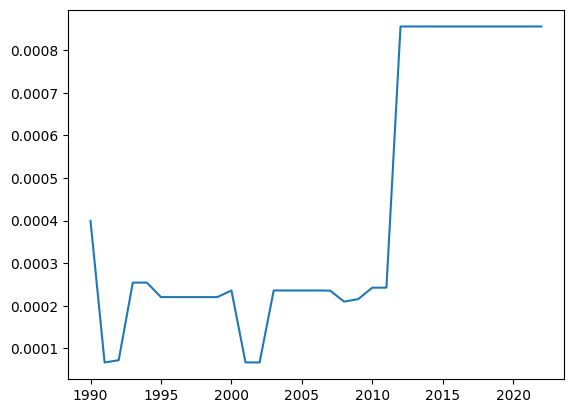

In [2777]:
plot_prob_series('United Sta', 1990, 2022)

In [2435]:
imputed_final_df

,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Group grievance index 0 (low) - 10 (high),target
0,2.862,68.802714,27.530,-10.098,-1.442265,-1.117251,-1.464961,20.940889,5.022661,10.336666,19.918,20.078000,7.693443,1.0
1,3.200,62.953580,44.086,-11.674,-0.680339,-0.592877,-0.931424,30.802537,3.200000,52.448593,12.480,36.974000,7.091352,1.0
2,3.308,63.058335,17.588,-6.974,-1.131327,-0.966480,-1.344888,23.421251,4.200000,40.078567,11.662,19.638000,7.747892,1.0
3,4.888,64.848588,32.680,-9.670,-1.104453,-0.947250,-1.268998,22.765414,3.200000,28.214980,14.434,17.994000,7.440641,1.0
4,-4.666,65.840000,85.330,-2.880,-0.555936,-0.370686,-0.654770,39.142406,4.218800,77.510038,9.238,54.480698,6.529400,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2.192,61.474000,102.502,6.844,1.958000,2.272000,0.910000,90.400000,1.000000,100.000000,9.200,83.712000,3.880000,0.0
360,3.764,57.978854,185.612,12.256,-0.055605,-0.096230,0.170615,42.532440,5.000000,100.506384,3.718,72.566000,5.135187,0.0
361,3.266,54.008000,92.912,-5.626,0.215000,0.775000,0.680000,54.031837,2.000000,30.964000,10.244,46.286000,3.501986,0.0
362,5.562,57.322000,78.522,-4.640,-0.561502,-0.585192,-0.467156,29.066605,3.000000,82.552000,6.366,34.132000,6.299755,0.0


In [809]:
Political globalization index (0-100)	0.034439
State legitimacy index 0 (high) - 10 (low)	0.036781
Group grievance index 0 (low) - 10 (high)	0.047436
Political stability index (-2.5 weak; 2.5 strong)	0.049971
Unemployment rate	0.057311

State legitimacy index 0 (high) - 10 (low)	0.026433
Group grievance index 0 (low) - 10 (high)	0.050533
Political globalization index (0-100)	0.053481
Government effectiveness index (-2.5 weak; 2.5 strong)	0.067615
Economic growth: the rate of change of real GDP	0.071518
    
Political rights index 7 (weak) - 1 (strong)	0.040486
Control of corruption (-2.5 weak; 2.5 strong)	0.047655
Unemployment rate	0.048271
Economic growth: the rate of change of real GDP	0.052553
Political globalization index (0-100)	0.055467

Control of corruption (-2.5 weak; 2.5 strong)	0.053851
Political rights index 7 (weak) - 1 (strong)	0.056640
Economic growth: the rate of change of real GDP	0.063314
    
Economic growth: the rate of change of real GDP	0.045032
Labor force participation rate	0.072194
Group grievance index 0 (low) - 10 (high)	0.081221

SyntaxError: invalid syntax (2497186478.py, line 1)

In [1332]:
1064, 1071

1064

In [2773]:
newnew = pd.read_csv('../raw_data/full_feature_set.csv')

In [ ]:
'Ivory Coast'
'Switzerland'
